In [ ]:
!wget -O "dataset.zip" "https://data.mendeley.com/public-files/datasets/g46dvrcvwn/files/60aa59c1-cd77-4c8a-9573-50d2fd8b10e9/file_downloaded"

--2025-11-28 14:15:02--  https://data.mendeley.com/public-files/datasets/g46dvrcvwn/files/60aa59c1-cd77-4c8a-9573-50d2fd8b10e9/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/6fa5ad64-11e3-451a-84a9-d834be2517ec [following]
--2025-11-28 14:15:07--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/6fa5ad64-11e3-451a-84a9-d834be2517ec
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.64.205, 3.5.72.149, 3.5.68.37, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.64.205|:443... conne

In [ ]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
   creating: Turmeric Plant Disease Augmented Dataset/
   creating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00001_aug_0.jpg  
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00001_aug_1.jpg  
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00001_aug_2.jpg  
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00001_aug_3.jpg  
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00002_aug_4.jpg  
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00002_aug_5.jpg  
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00002_aug_6.jpg  
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00002_aug_7.jpg  
  inflating: Turmeric Plant Disease Augmented Dataset/Dry Leaf/Dry Leaf00003_aug_10.jpg  
  inflating: Turmeric Plant Disease Augmented Da

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("/content/Turmeric Plant Disease Augmented Dataset", output="dataset", seed=1337, ratio=(.8, .1,.1))


Copying files: 4548 files [00:20, 227.27 files/s]


In [ ]:
train_dir = "/content/dataset/train"
validation_dir = "/content/dataset/val"

BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 3637 files belonging to 5 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
test_dir = "/content/dataset/test"
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 453 files belonging to 5 classes.
Found 458 files belonging to 5 classes.


In [ ]:
!ls -F /content/

 dataset/      sample_data/
 dataset.zip  'Turmeric Plant Disease Augmented Dataset'/


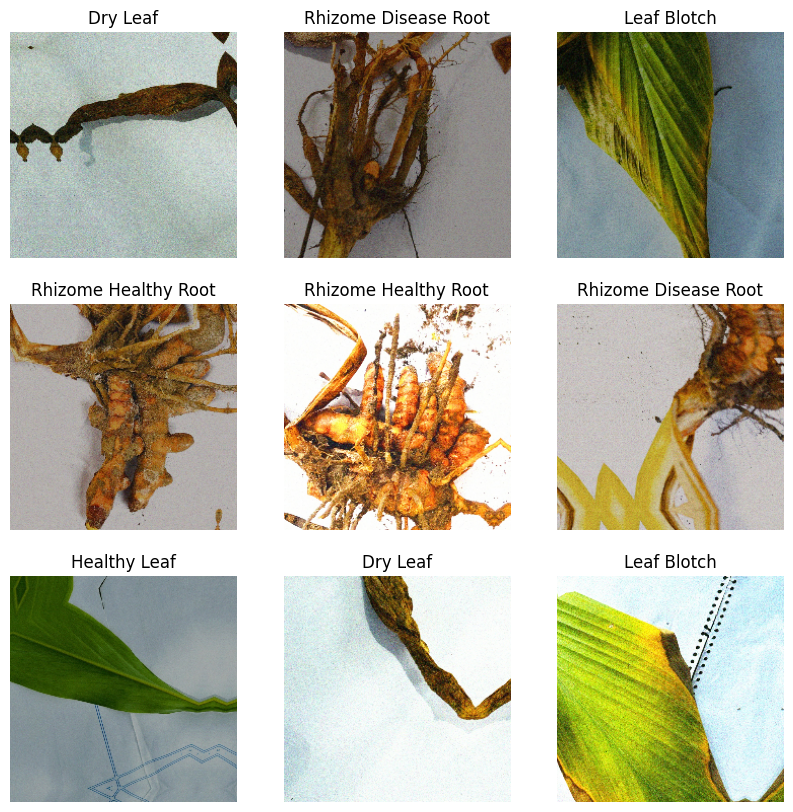

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
class_names

['Dry Leaf',
 'Healthy Leaf',
 'Leaf Blotch',
 'Rhizome Disease Root',
 'Rhizome Healthy Root']

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.VGG16(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet',
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 512)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 512)


In [ ]:
prediction_layer = tf.keras.layers.Dense(len(class_names), activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 5)


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 5)         │      2,565 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,717,253 (56.14 MB)

 Trainable params: 2,565 (10.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
len(model.trainable_variables)

2

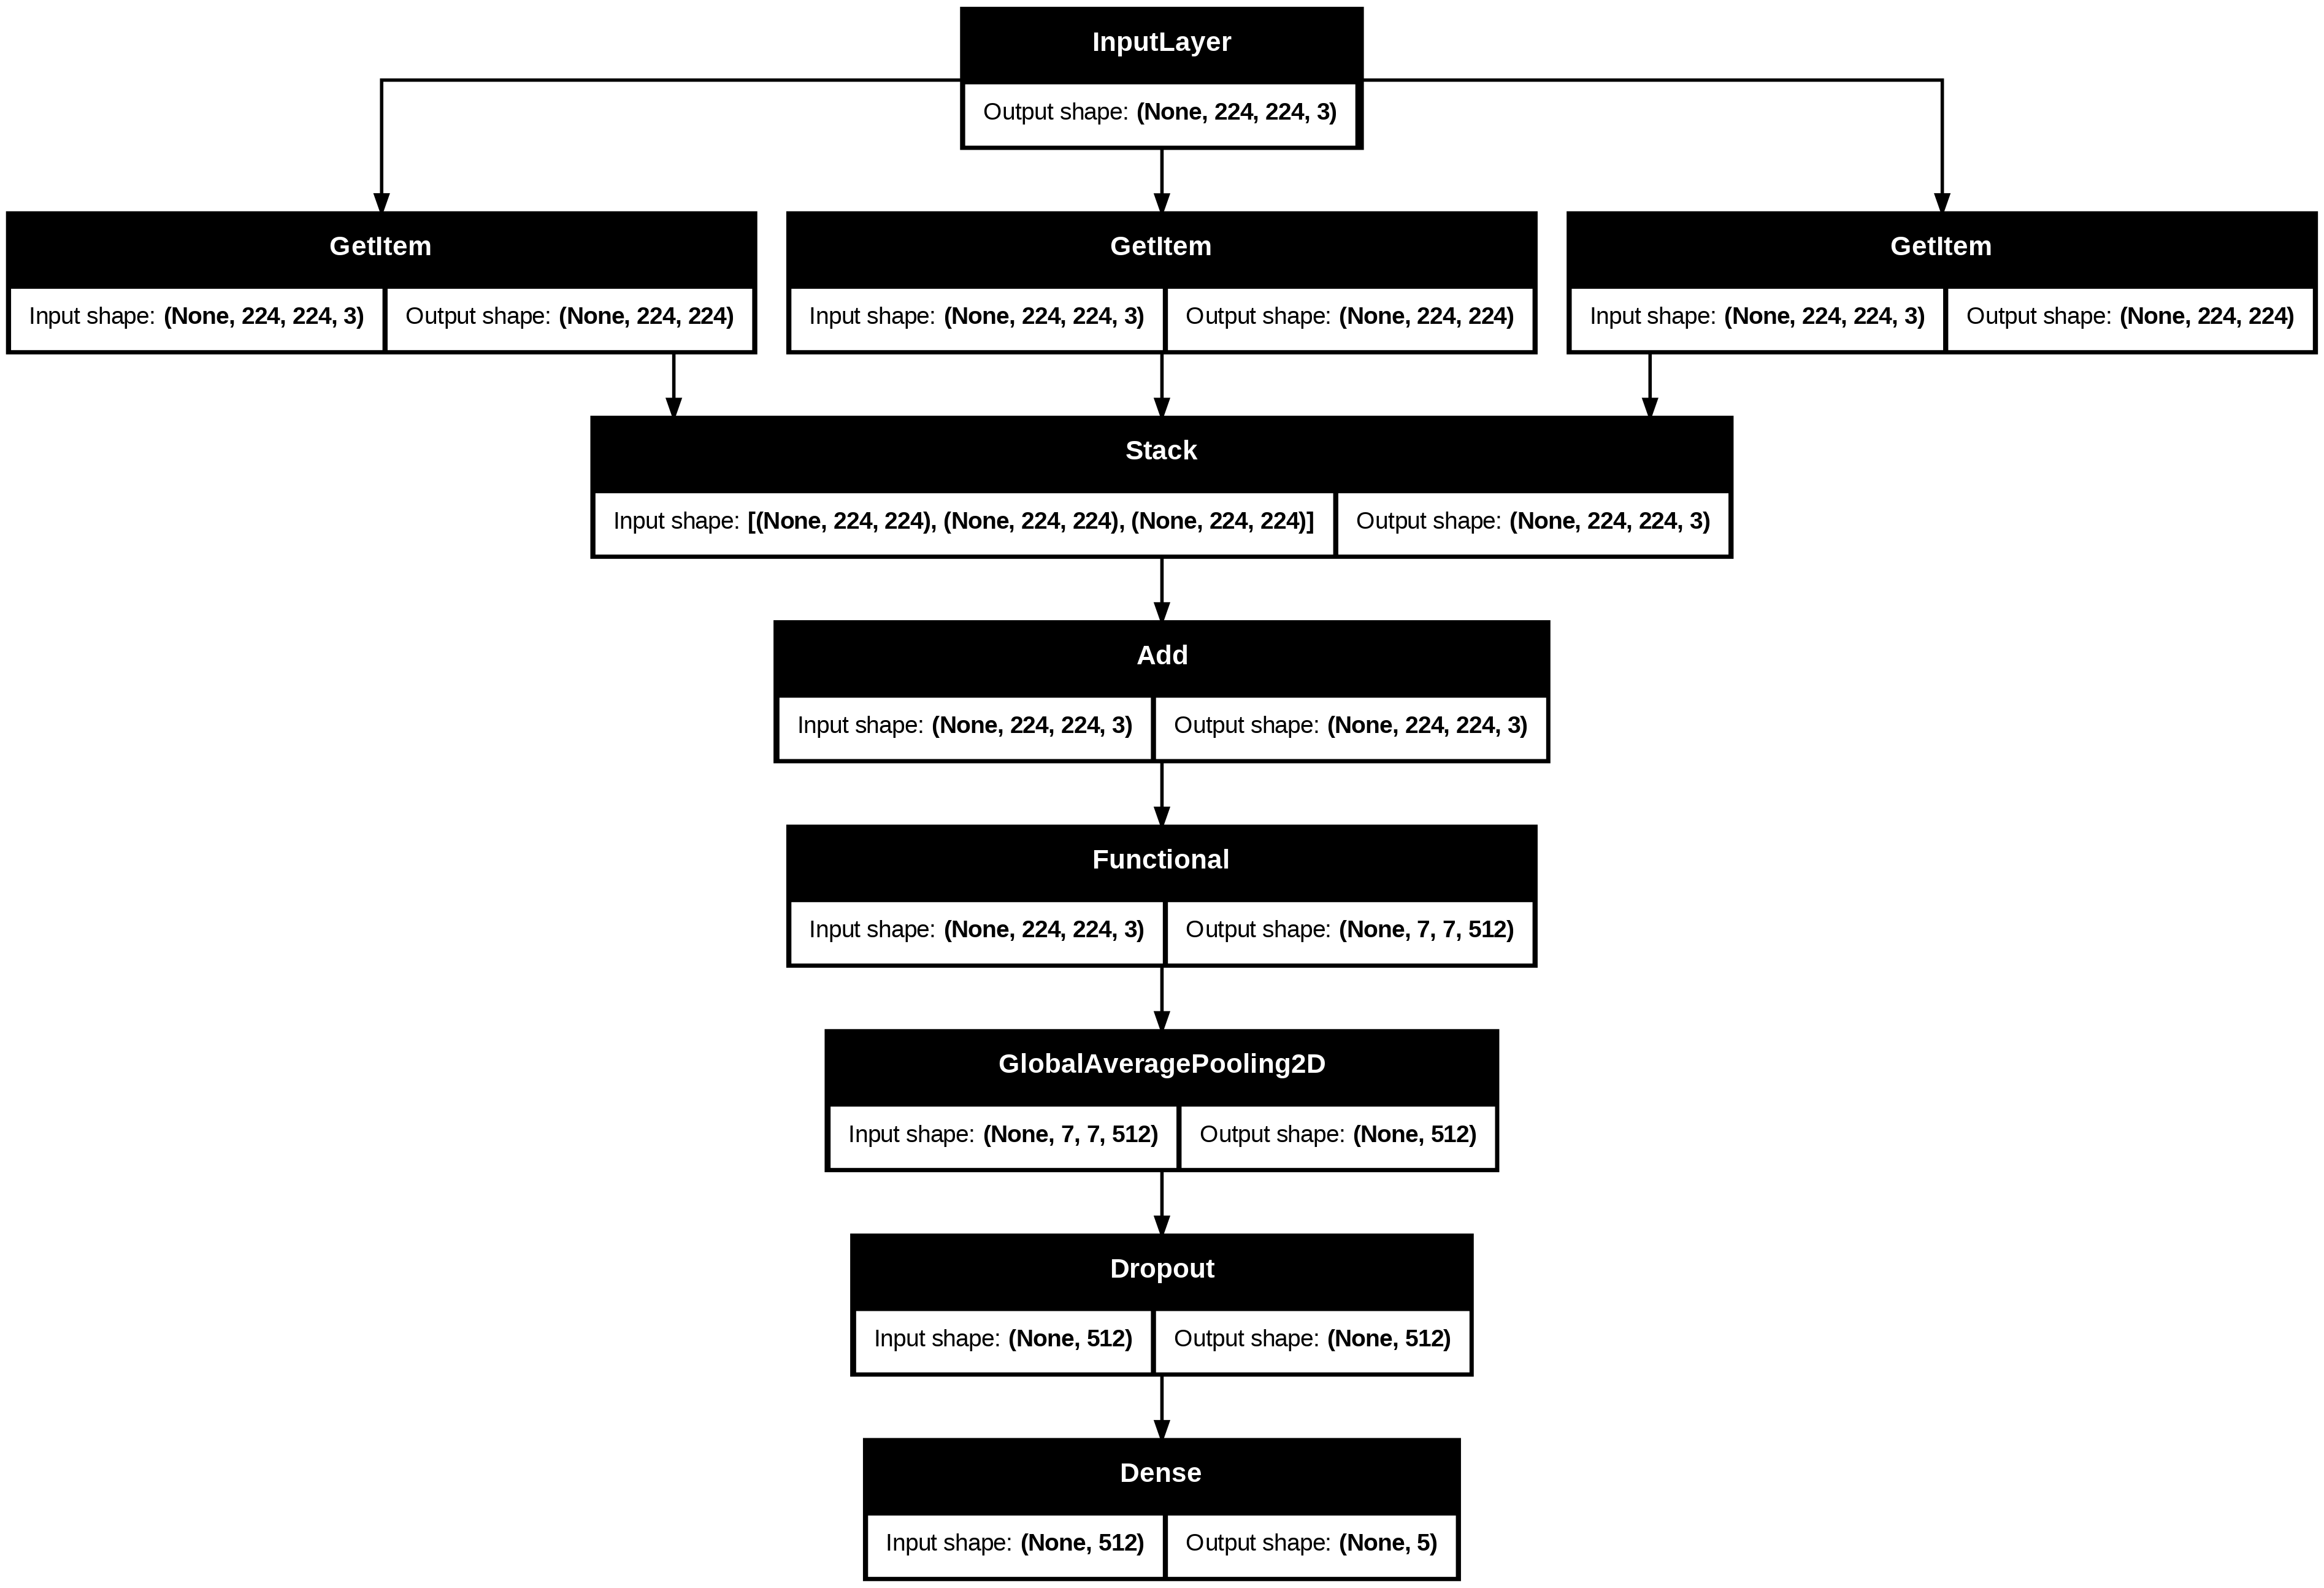

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [ ]:
initial_epochs = 6

loss0, accuracy0 = model.evaluate(validation_dataset)

15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 371ms/step - accuracy: 0.2174 - loss: 7.5123


In [ ]:

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 7.48
initial accuracy: 0.19


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/6
114/114 ━━━━━━━━━━━━━━━━━━━━ 49s 396ms/step - accuracy: 0.5059 - loss: 3.0922 - val_accuracy: 0.9404 - val_loss: 0.2137
Epoch 2/6
114/114 ━━━━━━━━━━━━━━━━━━━━ 34s 300ms/step - accuracy: 0.8966 - loss: 0.3487 - val_accuracy: 0.9757 - val_loss: 0.0695
Epoch 3/6
114/114 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - accuracy: 0.9418 - loss: 0.1801 - val_accuracy: 0.9890 - val_loss: 0.0470
Epoch 4/6
114/114 ━━━━━━━━━━━━━━━━━━━━ 35s 307ms/step - accuracy: 0.9527 - loss: 0.1366 - val_accuracy: 0.9934 - val_loss: 0.0343
Epoch 5/6
114/114 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - accuracy: 0.9720 - loss: 0.0782 - val_accuracy: 0.9934 - val_loss: 0.0268
Epoch 6/6
114/114 ━━━━━━━━━━━━━━━━━━━━ 37s 328ms/step - accuracy: 0.9772 - loss: 0.0679 - val_accuracy: 0.9934 - val_loss: 0.0289


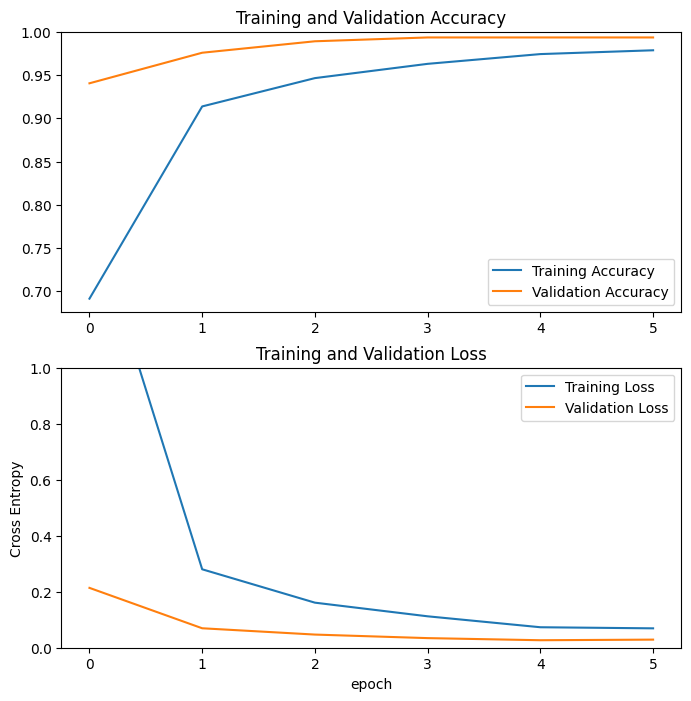

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  19


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')])

In [ ]:
# Get current learning rate
lr = model.optimizer.learning_rate
print("Current Learning Rate:", tf.keras.backend.get_value(lr))

Current Learning Rate: 0.001


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 5)         │      2,565 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,717,253 (56.14 MB)

 Trainable params: 2,565 (10.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
len(model.trainable_variables)

2

In [ ]:
fine_tune_epochs = 10
initial_epochs = 6 # Redefine initial_epochs
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=len(history.epoch),
                         validation_data=validation_dataset)

Epoch 7/16
114/114 ━━━━━━━━━━━━━━━━━━━━ 40s 317ms/step - accuracy: 0.9825 - loss: 0.0528 - val_accuracy: 0.9912 - val_loss: 0.0293
Epoch 8/16
114/114 ━━━━━━━━━━━━━━━━━━━━ 36s 297ms/step - accuracy: 0.9834 - loss: 0.0427 - val_accuracy: 0.9956 - val_loss: 0.0085
Epoch 9/16
114/114 ━━━━━━━━━━━━━━━━━━━━ 43s 316ms/step - accuracy: 0.9849 - loss: 0.0312 - val_accuracy: 0.9956 - val_loss: 0.0196
Epoch 10/16
114/114 ━━━━━━━━━━━━━━━━━━━━ 35s 305ms/step - accuracy: 0.9874 - loss: 0.0419 - val_accuracy: 0.9978 - val_loss: 0.0067
Epoch 11/16
114/114 ━━━━━━━━━━━━━━━━━━━━ 42s 317ms/step - accuracy: 0.9867 - loss: 0.0317 - val_accuracy: 0.9956 - val_loss: 0.0264
Epoch 12/16
114/114 ━━━━━━━━━━━━━━━━━━━━ 40s 308ms/step - accuracy: 0.9862 - loss: 0.0317 - val_accuracy: 0.9956 - val_loss: 0.0111
Epoch 13/16
114/114 ━━━━━━━━━━━━━━━━━━━━ 41s 308ms/step - accuracy: 0.9911 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 14/16
114/114 ━━━━━━━━━━━━━━━━━━━━ 42s 316ms/step - accuracy: 0.9929 - lo

In [ ]:
y_true = []
y_pred = []

for images, labels in validation_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step


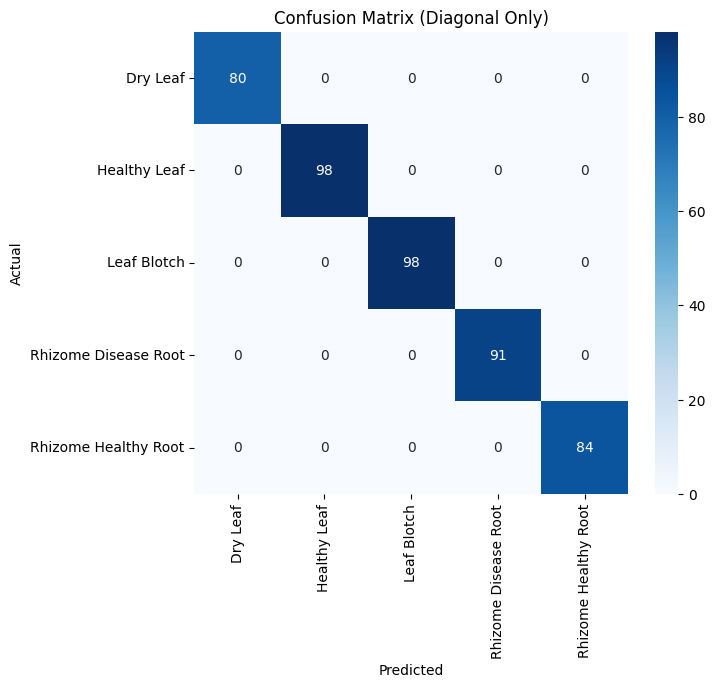

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix from your y_true, y_pred
cm = confusion_matrix(y_true, y_pred)

# diagonal-only matrix
cm_diagonal = np.zeros_like(cm)
np.fill_diagonal(cm_diagonal, np.diag(cm))

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_diagonal,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title("Confusion Matrix (Diagonal Only)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

NameError: name 'model' is not defined

In [ ]:
import numpy as np

# Combine history from initial training and fine-tuning
total_train_acc = history.history['accuracy'] + history_fine.history['accuracy']
total_val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
total_train_loss = history.history['loss'] + history_fine.history['loss']
total_val_loss = history.history['val_loss'] + history_fine.history['val_loss']

print(f"Latest Training Accuracy: {total_train_acc[-1]:.4f}")
print(f"Latest Validation Accuracy: {total_val_acc[-1]:.4f}")
print(f"Testing Accuracy: {accuracy:.4f}")
print(f"Latest Training Loss: {total_train_loss[-1]:.4f}")
print(f"Latest Validation Loss: {total_val_loss[-1]:.4f}")

NameError: name 'history' is not defined

Predictions:
 [1 3 4 1 1 0 0 0 0 4 2 4 2 1 4 2 0 2 1 1 1 0 2 4 0 4 3 3 1 3 0 3]
Labels:
 [1 3 4 1 1 0 0 0 0 4 2 4 2 1 4 2 0 2 1 1 1 0 2 4 0 4 3 3 1 3 0 3]


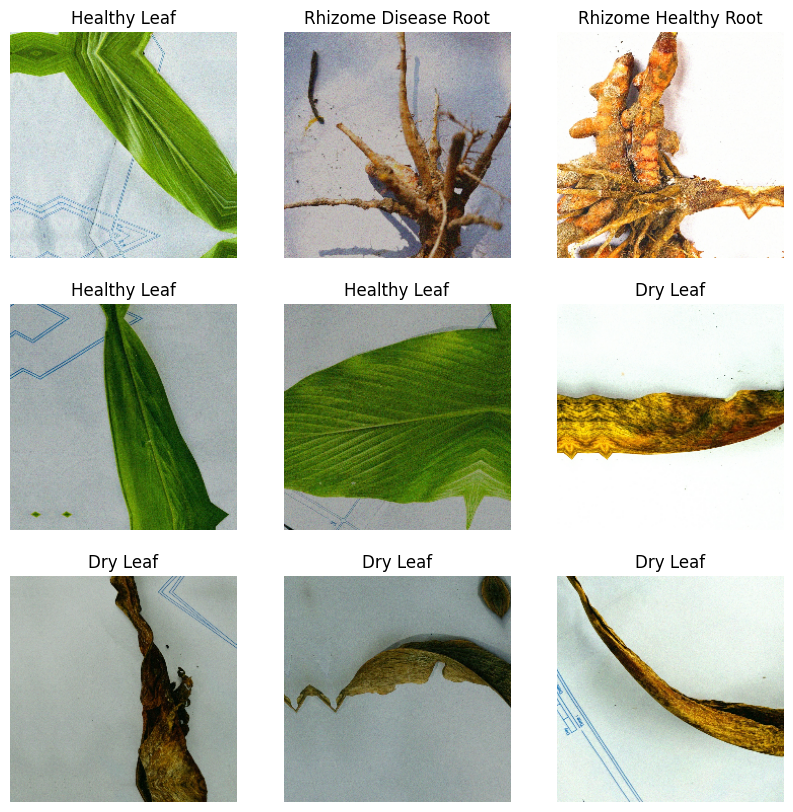

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
predictions = tf.argmax(predictions,axis=1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [ ]:
model.save("plant_disease_recog_model_pwpvgg16.keras")

In [ ]:
!find /content -name "turmeric-plant_disease_recog_model_pwp.keras"

In [ ]:
import numpy as np

# Combine history from initial training and fine-tuning
total_train_acc = history.history['accuracy'] + history_fine.history['accuracy']
total_val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
total_train_loss = history.history['loss'] + history_fine.history['loss']
total_val_loss = history.history['val_loss'] + history_fine.history['val_loss']

print(f"Latest Training Accuracy: {total_train_acc[-1]:.4f}")
print(f"Latest Validation Accuracy: {total_val_acc[-1]:.4f}")
print(f"Testing Accuracy: {accuracy:.4f}")
print(f"Latest Training Loss: {total_train_loss[-1]:.4f}")
print(f"Latest Validation Loss: {total_val_loss[-1]:.4f}")

Latest Training Accuracy: 0.9931
Latest Validation Accuracy: 0.9956
Testing Accuracy: 0.9934
Latest Training Loss: 0.0185
Latest Validation Loss: 0.0069
